In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import warnings
warnings.simplefilter('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
import os
import glob
import cv2

Image size: 
(1080, 1920, 3)


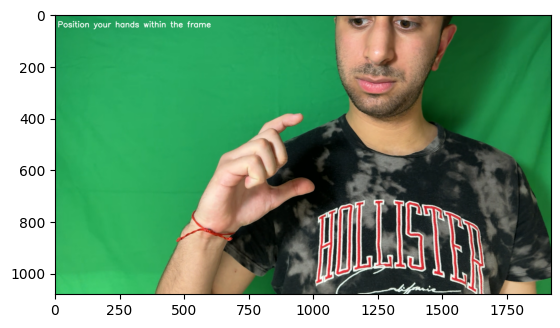

In [3]:
img = cv2.imread('/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET/C - c/10.png')
print("Image size: ")
print(img.shape)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1)


In [4]:
train_data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET',label_mode='categorical',shuffle=False)
test_data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/2_HAND_DATASET/2_HAND_DATASET',shuffle=False,label_mode='categorical')

Found 11000 files belonging to 11 classes.
Found 23000 files belonging to 23 classes.


In [5]:
train_class=os.listdir('/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET/')
count_dict1 = {}
img_dict1 = {}

# Loop through classes
for cls in train_class:  # Assuming class_names contains the list of dog classes
    image_path = glob.glob(f'/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET/{cls}/*')
    count_dict1[cls] = len(image_path)

    if image_path:  # Check if image_path is not empty
        img_dict1[cls] = tf.keras.utils.load_img(random.choice(image_path))
count_dict1

{'Five - 5': 1000,
 'Four - 4': 1000,
 'Six - 6': 1000,
 'Eight - 8': 1000,
 'One - 1': 1000,
 'Nine - 9': 1000,
 'Seven - 7 ': 1000,
 'Two - 2': 1000,
 'C - c': 1000,
 'Three - 3': 1000,
 'Zero - 0': 1000}

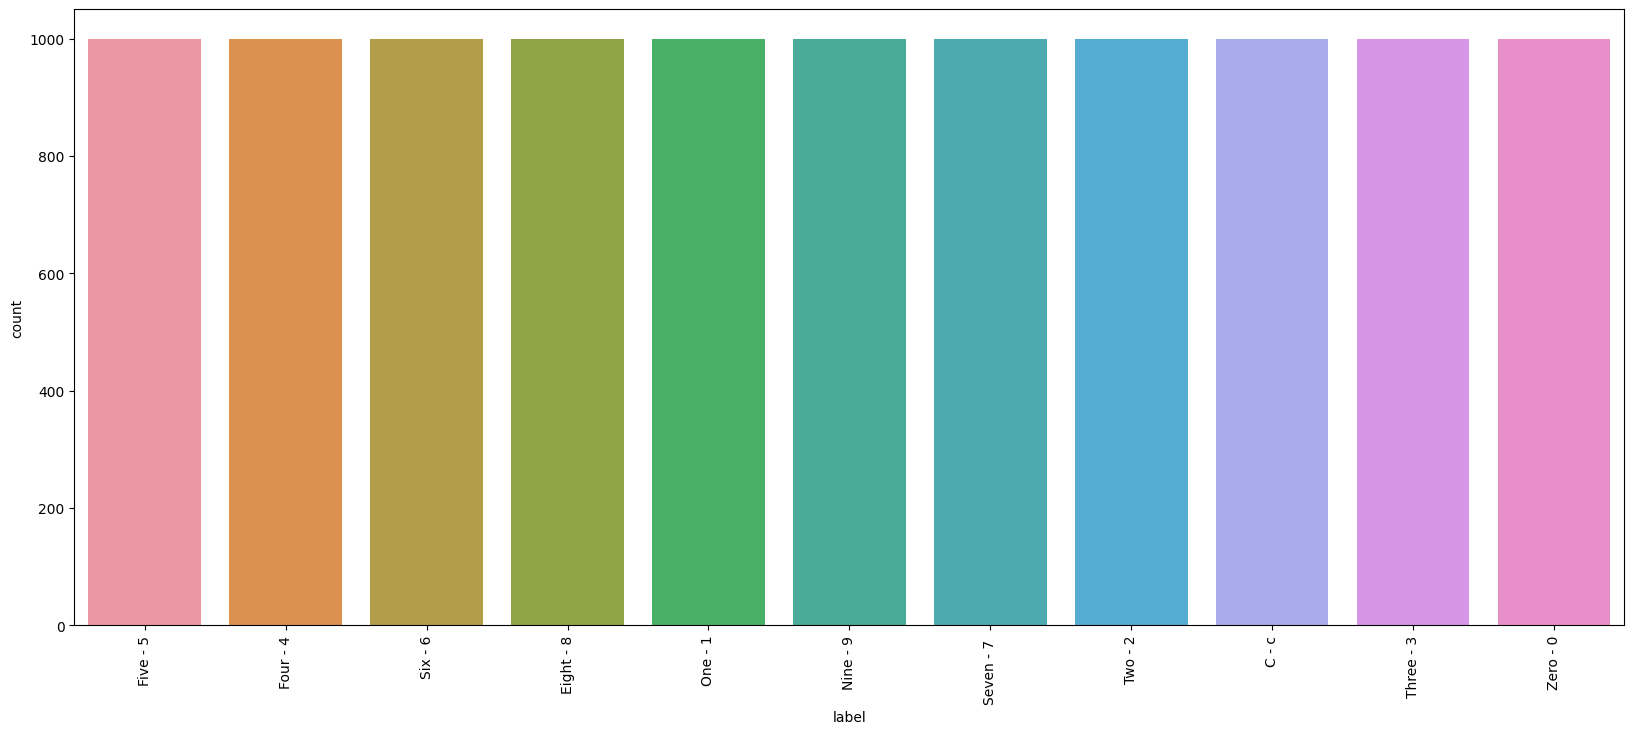

In [6]:
df1 = pd.DataFrame(data={'label':count_dict1.keys(),'count':count_dict1.values()})
plt.figure(figsize=(20,8))
sns.barplot(x='label',y='count',data=df1)
plt.xticks(rotation=90)
plt.show()

In [7]:
train_class=os.listdir('/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/2_HAND_DATASET/2_HAND_DATASET/')
count_dict1 = {}
img_dict1 = {}

# Loop through classes
for cls in train_class:  # Assuming class_names contains the list of dog classes
    image_path = glob.glob(f'/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/2_HAND_DATASET/2_HAND_DATASET/{cls}/*')
    count_dict1[cls] = len(image_path)

    if image_path:  # Check if image_path is not empty
        img_dict1[cls] = tf.keras.utils.load_img(random.choice(image_path))
count_dict1

{'X - x': 1000,
 'G - g': 1000,
 'N - n': 1000,
 'P - p': 1000,
 'V - v': 1000,
 'M - m': 1000,
 'O - o': 1000,
 'Ten - 10': 1000,
 'K - k': 1000,
 'Q - q': 1000,
 'R - r': 1000,
 'B - b': 1000,
 'W - w': 1000,
 'U - u': 1000,
 'E - e': 1000,
 'F - f': 1000,
 'T - t': 1000,
 'D - d': 1000,
 'I - i': 1000,
 'Z - z': 1000,
 'A - a': 1000,
 'S - s': 1000,
 'L - l': 1000}

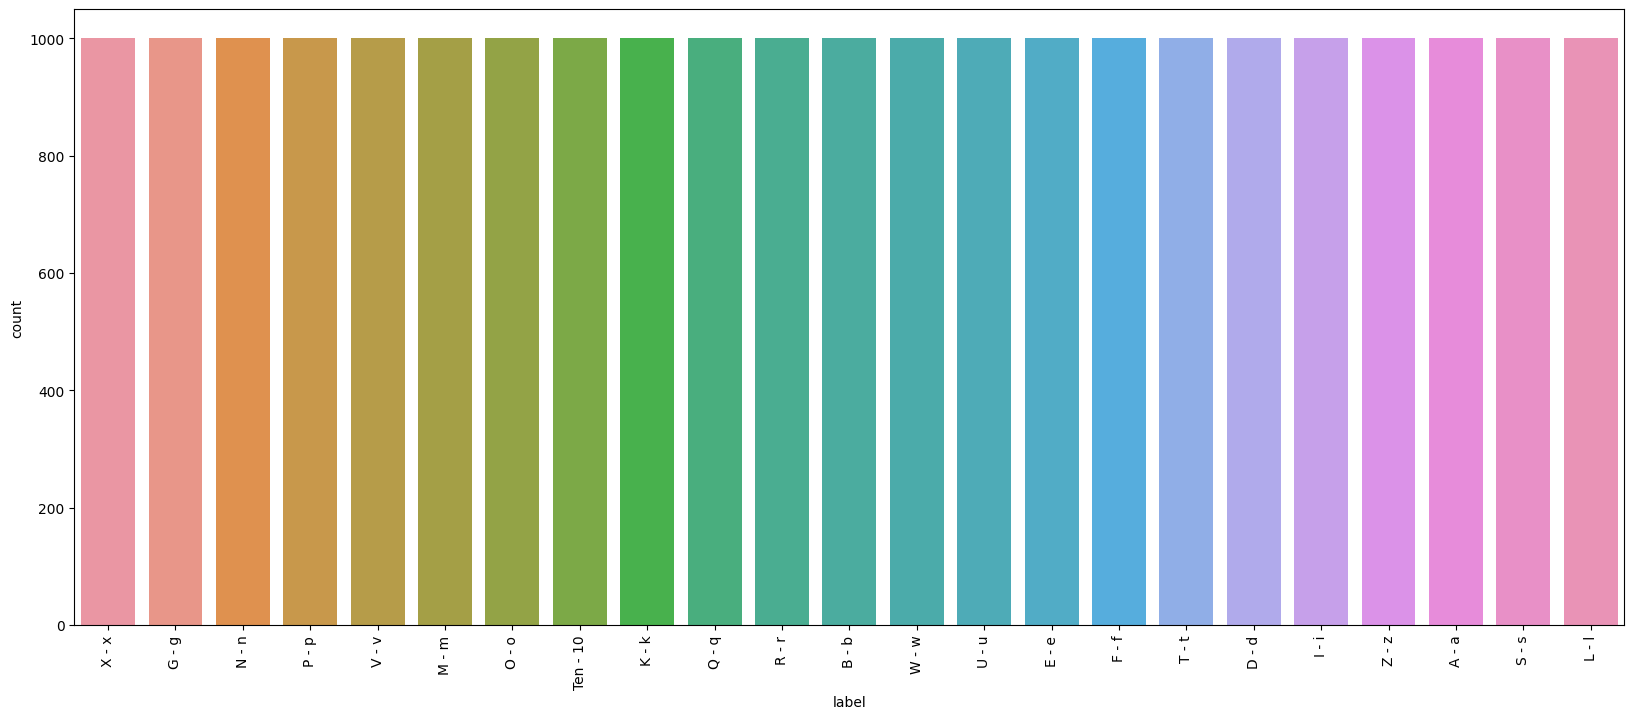

In [8]:
df1 = pd.DataFrame(data={'label':count_dict1.keys(),'count':count_dict1.values()})
plt.figure(figsize=(20,8))
sns.barplot(x='label',y='count',data=df1)
plt.xticks(rotation=90)
plt.show()

In [10]:
# !pip install mediapipe

In [11]:
# !rm -rf /kaggle/working/*

### Saving for 1 hand dataset

In [12]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# Directories for Folder 1 and Folder 2
folder1_path = '/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET'
# folder2_path = '/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/2_HAND_DATASET/2_HAND_DATASET'

# Directory to save the CSV files (writeable)
output_dir = '/kaggle/working/'
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Initialize MediaPipe for hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# CSV header format
columns = ['0_x', '0_y', '1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y',
           '5_x', '5_y', '6_x', '6_y', '7_x', '7_y', '8_x', '8_y', '9_x', '9_y',
           '10_x', '10_y', '11_x', '11_y', '12_x', '12_y', '13_x', '13_y', '14_x', '14_y',
           '15_x', '15_y', '16_x', '16_y', '17_x', '17_y', '18_x', '18_y', '19_x', '19_y',
           '20_x', '20_y', 'class_id']

# Function to process images and save landmarks to CSV
def process_images_in_folder(folder_path):
    # Loop through each subfolder (class_id)
    for class_id in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, class_id)
        if os.path.isdir(subfolder_path):
            # Create an empty DataFrame to store landmarks
            df = pd.DataFrame(columns=columns)
            print(f"Processing class: {class_id}")

            # Loop through each image in the subfolder
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)

                if img is None:
                    continue  # Skip if the image is not read correctly

                # Convert the image to RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Process the image using MediaPipe
                results = hands.process(img_rgb)

                # Extract hand landmarks if detected
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        row = []
                        for idx, lm in enumerate(hand_landmarks.landmark):
                            h, w, _ = img.shape
                            row.extend([lm.x * w, lm.y * h])  # Append x, y coordinates
                        
                        # Add the class_id
                        row.append(class_id)

                        # Add row to the DataFrame
                        df.loc[len(df)] = row

            # Save DataFrame to CSV in the writeable directory
            output_csv_path = os.path.join(output_dir, f"{class_id}_landmarks.csv")
            df.to_csv(output_csv_path, index=False)
            print(f"CSV saved for class: {class_id}")

# Process both Folder 1 and Folder 2
process_images_in_folder(folder1_path)
# process_images_in_folder(folder2_path)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1729008550.198805     123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729008550.228489     123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729008550.267846     122 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Processing class: Five - 5
CSV saved for class: Five - 5
Processing class: Four - 4
CSV saved for class: Four - 4
Processing class: Six - 6
CSV saved for class: Six - 6
Processing class: Eight - 8
CSV saved for class: Eight - 8
Processing class: One - 1
CSV saved for class: One - 1
Processing class: Nine - 9
CSV saved for class: Nine - 9
Processing class: Seven - 7 
CSV saved for class: Seven - 7 
Processing class: Two - 2
CSV saved for class: Two - 2
Processing class: C - c
CSV saved for class: C - c
Processing class: Three - 3
CSV saved for class: Three - 3
Processing class: Zero - 0
CSV saved for class: Zero - 0


### saving for 2 hands dataset

In [13]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# Directories for Folder 1 and Folder 2
# folder1_path = '/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/1_HAND_DATASET/1_HAND_DATASET'
folder2_path = '/kaggle/input/bsl-numbers-and-alphabet-hand-position-for-mediapipe/2_HAND_DATASET/2_HAND_DATASET'

# Directory to save the CSV files (writeable)
output_dir = '/kaggle/working/'
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Initialize MediaPipe for hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# CSV header format (with left and right hand landmarks)
columns = ['left_' + str(i) + '_x' for i in range(21)] + ['left_' + str(i) + '_y' for i in range(21)] + \
          ['right_' + str(i) + '_x' for i in range(21)] + ['right_' + str(i) + '_y' for i in range(21)] + \
          ['class_id']

# Function to process images and save landmarks to CSV
def process_images_in_folder(folder_path):
    for class_id in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, class_id)
        if os.path.isdir(subfolder_path):
            df = pd.DataFrame(columns=columns)
            print(f"Processing class: {class_id}")

            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                results = hands.process(img_rgb)
                row = []

                if results.multi_hand_landmarks:
                    for i, hand_landmarks in enumerate(results.multi_hand_landmarks):
                        for lm in hand_landmarks.landmark:
                            h, w, _ = img.shape
                            row.extend([lm.x * w, lm.y * h])

                    if len(results.multi_hand_landmarks) < 2:
                        row.extend([0] * 42)  # Fill in missing hand coordinates

                    row.append(class_id)
                    df.loc[len(df)] = row

            output_csv_path = os.path.join(output_dir, f"{class_id}_landmarks.csv")
            df.to_csv(output_csv_path, index=False)
            print(f"CSV saved for class: {class_id}")

# Process both Folder 1 and Folder 2
# process_images_in_folder(folder1_path)
process_images_in_folder(folder2_path)


Processing class: X - x


W0000 00:00:1729009653.628124     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729009653.655997     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


CSV saved for class: X - x
Processing class: G - g
CSV saved for class: G - g
Processing class: N - n
CSV saved for class: N - n
Processing class: P - p
CSV saved for class: P - p
Processing class: V - v
CSV saved for class: V - v
Processing class: M - m
CSV saved for class: M - m
Processing class: O - o
CSV saved for class: O - o
Processing class: Ten - 10
CSV saved for class: Ten - 10
Processing class: K - k
CSV saved for class: K - k
Processing class: Q - q
CSV saved for class: Q - q
Processing class: R - r
CSV saved for class: R - r
Processing class: B - b
CSV saved for class: B - b
Processing class: W - w
CSV saved for class: W - w
Processing class: U - u
CSV saved for class: U - u
Processing class: E - e
CSV saved for class: E - e
Processing class: F - f
CSV saved for class: F - f
Processing class: T - t
CSV saved for class: T - t
Processing class: D - d
CSV saved for class: D - d
Processing class: I - i
CSV saved for class: I - i
Processing class: Z - z
CSV saved for class: Z - 

In [14]:
import pandas as pd

# Read and display the CSV
df = pd.read_csv('/kaggle/working/B - b_landmarks.csv')
print(df.head())  # Display the first few rows


      left_0_x    left_1_x     left_2_x    left_3_x     left_4_x    left_5_x  \
0  1222.441292  461.793705  1168.474274  446.574701  1133.641663  414.543943   
1   849.070072  417.501369   796.574421  411.805322   760.919380  381.925138   
2  1370.364761  469.983659  1318.089180  462.327518  1276.719704  431.460078   
3  1130.761299  651.341693  1069.065170  643.936672  1007.427292  591.822982   
4   394.522991  527.855000   448.208256  507.710431   486.566677  471.933196   

      left_6_x    left_7_x     left_8_x    left_9_x  ...  right_12_y  \
0  1102.685738  393.038399  1076.389046  374.721411  ...  345.991380   
1   732.797813  363.452464   705.936184  348.917681  ...  333.675470   
2  1244.019814  414.446161  1213.694801  403.195560  ...  383.135254   
3   963.593330  557.189269   933.233185  525.174894  ...  489.409472   
4   511.208267  441.886382   532.022152  415.686854  ...  386.185248   

    right_13_y  right_14_y   right_15_y  right_16_y   right_17_y  right_18_y  \
0   93